# Prequisites

In [1]:
import onnxruntime as ort
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ONNX Inference

In [19]:
session = ort.InferenceSession("hrnet_coco_w48_Nx384x288.onnx")

In [20]:
input_name = session.get_inputs()[0].name
print("Input Name : ",input_name)

Input Name :  input.1


In [ ]:
orig = cv2.imread("../../data/hazmat.jpg")
h, w = orig.shape[:2]
print("Original H-W",h,w)
img = cv2.resize(orig, (288, 384)) #(w,h)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
std  = np.array([0.229, 0.224, 0.225], dtype=np.float32)
img = (img - mean) / std
img = img.transpose(2, 0, 1)[None, ...]  # shape: [1, 3, h, w]

Original H-W 357 500


In [26]:
outputs = session.run(None, {input_name: img})[0][0]  # [keypoints, H, W]

In [28]:
outputs.shape

(17, 96, 72)

In [32]:
keypoints = []
kp_h, kp_w = outputs.shape[1:]
for i in range(outputs.shape[0]):
    y, x = divmod(outputs[i].argmax(), kp_w)
    keypoints.append((int(x * w / kp_w), int(y * h / kp_h)))

In [33]:
for x, y in keypoints:
    cv2.circle(orig, (x, y), 4, (0, 255, 0), -1)

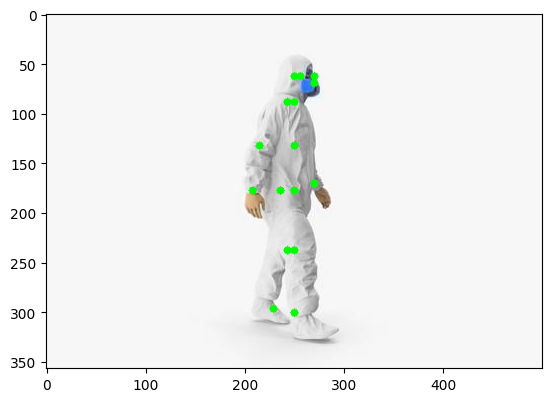

In [34]:
plt.imshow(orig)